In [13]:
!git clone https://github.com/imostafizur/CSE498R.git

fatal: destination path 'CSE498R' already exists and is not an empty directory.


## Pneumonia Detection with InceptionResnetv2

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
image = ('Pneumonia')


In [16]:
# InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False 

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

In [18]:
# Data Augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Data Augmentation
train_generator = train_datagen.flow_from_directory(
        'Pneumonia',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [20]:
# Data Augmentation
validation_generator = test_datagen.flow_from_directory(
        'Pneumonia',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [21]:
# Data Augmentation
checkpoint = ModelCheckpoint("Pneumonia_InceptionResnetV2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

In [22]:
# Data Augmentation
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [23]:
# Data Augmentation
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=5216 // 32,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=624 // 32,
        callbacks=[checkpoint, early])
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8386
Epoch 1: val_accuracy improved from -inf to 0.92599, saving model to Pneumonia_InceptionResnetV2.h5
163/163 [==============================] - 126s 714ms/step - loss: 0.3497 - accuracy: 0.8386 - val_loss: 0.2058 - val_accuracy: 0.9260
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.2332 - accuracy: 0.9032
Epoch 2: val_accuracy did not improve from 0.92599
163/163 [==============================] - 111s 680ms/step - loss: 0.2332 - accuracy: 0.9032 - val_loss: 0.2300 - val_accuracy: 0.9030
Epoch 3/100
163/163 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9086
Epoch 3: val_accuracy improved from 0.92599 to 0.94737, saving model to Pneumonia_InceptionResnetV2.h5
163/163 [==============================] - 112s 684ms/step - loss: 0.2177 - accuracy: 0.9086 - val_loss: 0.1356 - val_accuracy: 0.9474
Epoch 4/100
163/163 [=============================

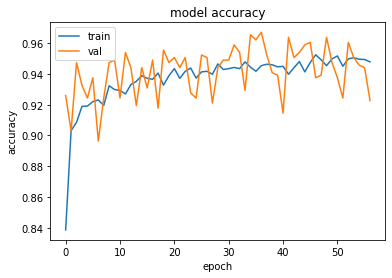

In [24]:
# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# Save the model
model.save("Pneumonia_InceptionResnetV2.h5")